# Exploratory Data Analysis (EDA) for Customer Churn

## Step 1: Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

## Step 2: Load Data

In [4]:
data_path = '../data/Churn_Modelling.csv'
df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## Step 3: Data Overview

In [5]:
print('Shape of data: ', df.shape)
print('\nData Types:')
print(df.dtypes)

Shape of data:  (10002, 14)

Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Step 4: Target Variable Analysis

C:\Users\azzaz\AppData\Local\Temp\ipykernel_23992\3091308891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='coolwarm')


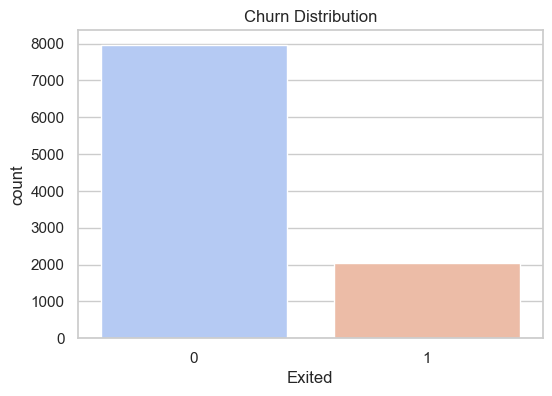

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

In [10]:
churn_rate = df['Exited'].mean()
print(f'Churn Rate: {churn_rate:.2%}')

Churn Rate: 20.38%


## Step 5: Categorical Features

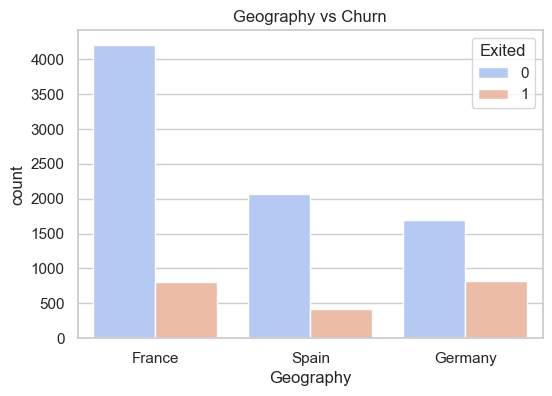

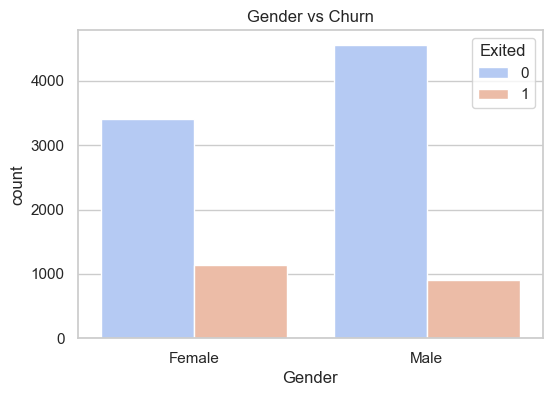

In [11]:
cat_cols = ['Geography', 'Gender']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=df, palette='coolwarm')
    plt.title(f"{col} vs Churn")
    plt.show()

## Step 6: Numerical Features

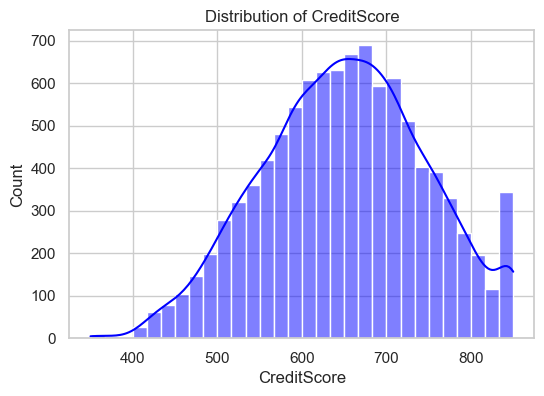

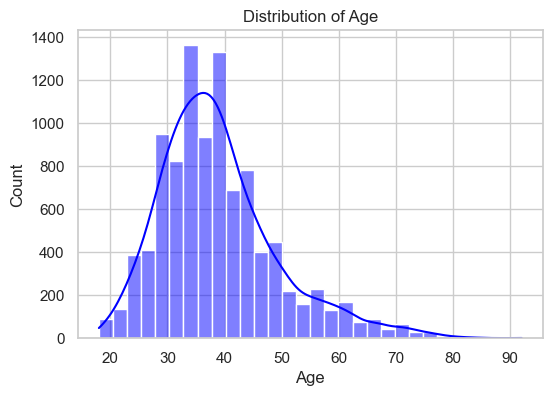

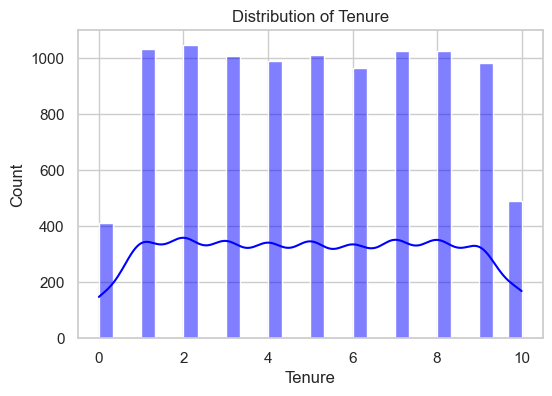

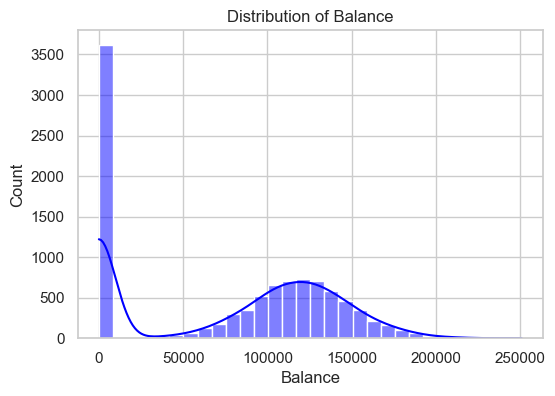

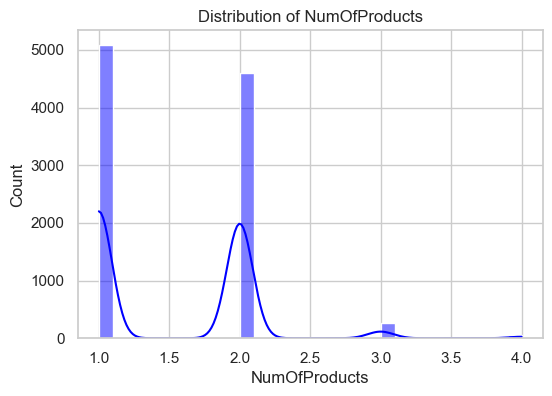

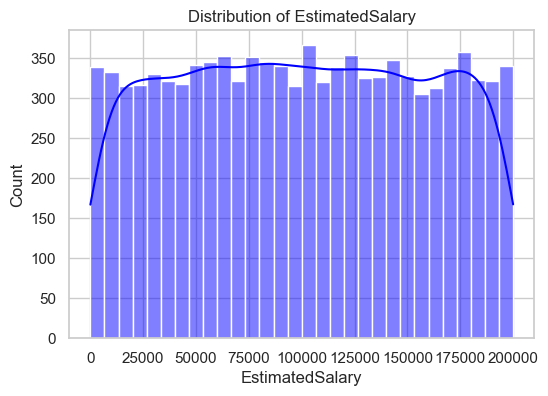

In [12]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

## Step 7: Correlation Analysis

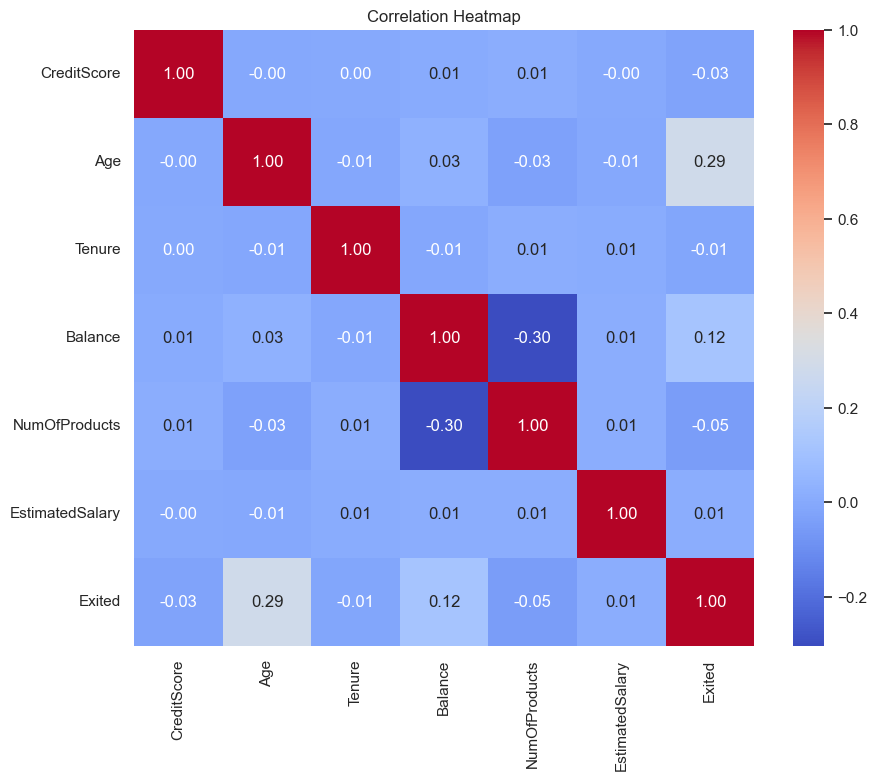

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols + ['Exited']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Step 8: Outlier Detection

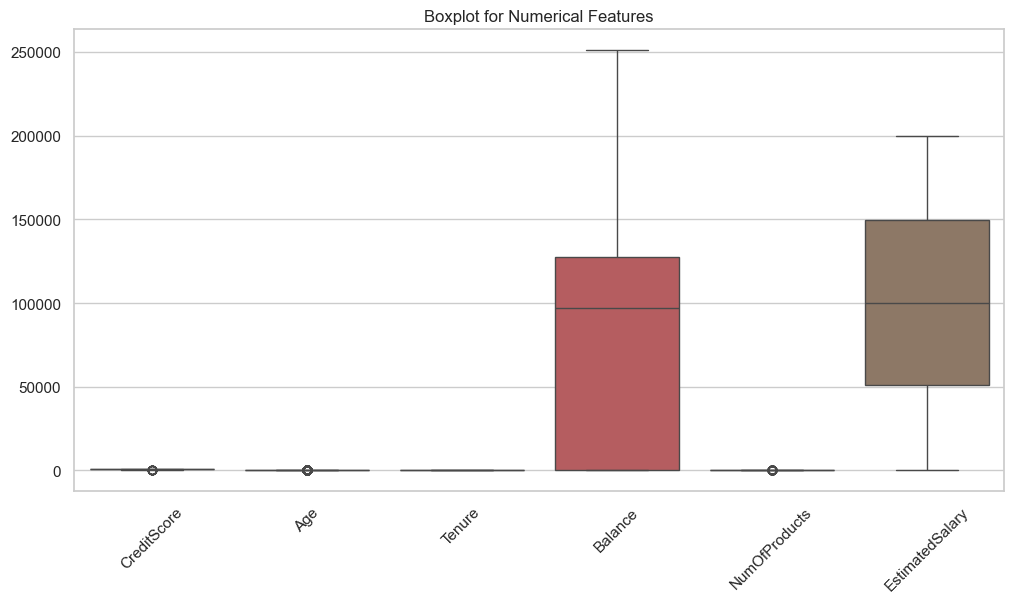

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)
plt.show()

## Step 9: Insight Summary
- Churn rate sekitar 20.38%
- Distribusi umur skew ke kanan, sebagian besar pelanggan umur 30-40
- Fitur Balance banyak yang nol (bisa jadi kelompok nasabah tertentu)
- NumOfProducts dan IsActiveMember mungkin signifikan terhadap churn
- Perlu OneHotEncoding untuk kategorikal seperti Geography dan Gender
- Korelasi antara Age dan Churn cukup signifikan